<a href="https://colab.research.google.com/github/fatmanurkarsatar/Machine_Learning_Projects/blob/main/knn_ile_meme_kanseri_tespiti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [ ]:
data = pd.read_csv('breast-cancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data.drop(["id"],axis=1)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
M=data[data.diagnosis=="M"]
B=data[data.diagnosis=="B"]

In [ ]:
M.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 0 to 567
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       212 non-null    int64  
 1   diagnosis                212 non-null    object 
 2   radius_mean              212 non-null    float64
 3   texture_mean             212 non-null    float64
 4   perimeter_mean           212 non-null    float64
 5   area_mean                212 non-null    float64
 6   smoothness_mean          212 non-null    float64
 7   compactness_mean         212 non-null    float64
 8   concavity_mean           212 non-null    float64
 9   concave points_mean      212 non-null    float64
 10  symmetry_mean            212 non-null    float64
 11  fractal_dimension_mean   212 non-null    float64
 12  radius_se                212 non-null    float64
 13  texture_se               212 non-null    float64
 14  perimeter_se             2

In [ ]:
B.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 19 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       357 non-null    int64  
 1   diagnosis                357 non-null    object 
 2   radius_mean              357 non-null    float64
 3   texture_mean             357 non-null    float64
 4   perimeter_mean           357 non-null    float64
 5   area_mean                357 non-null    float64
 6   smoothness_mean          357 non-null    float64
 7   compactness_mean         357 non-null    float64
 8   concavity_mean           357 non-null    float64
 9   concave points_mean      357 non-null    float64
 10  symmetry_mean            357 non-null    float64
 11  fractal_dimension_mean   357 non-null    float64
 12  radius_se                357 non-null    float64
 13  texture_se               357 non-null    float64
 14  perimeter_se             

<function matplotlib.pyplot.show(close=None, block=None)>

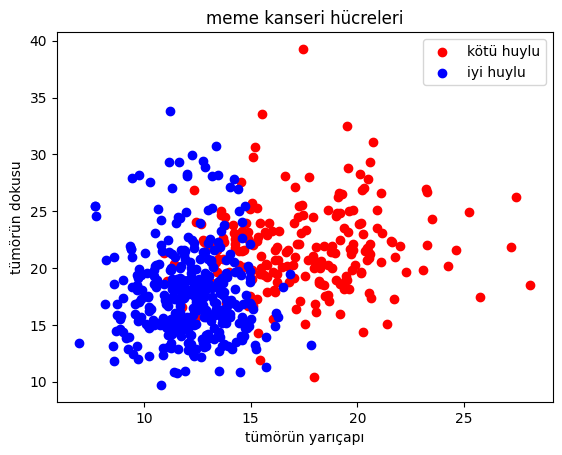

In [ ]:
plt.title("meme kanseri hücreleri")
plt.xlabel("tümörün yarıçapı")
plt.ylabel("tümörün dokusu")
plt.scatter(M.radius_mean,M.texture_mean,color="red",label="kötü huylu")
plt.scatter(B.radius_mean,B.texture_mean,color="blue",label="iyi huylu")
plt.legend()
plt.show

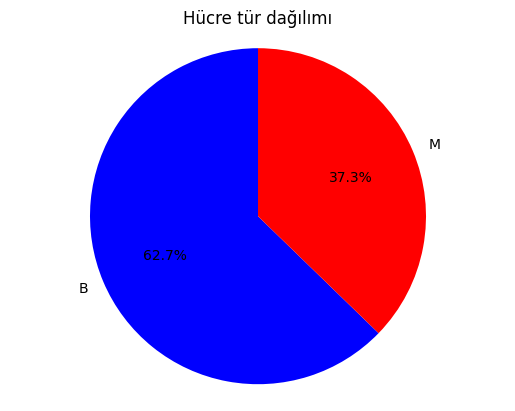

In [ ]:
#daire grafiği çizdirdik.
labels= ['B','M']
sizes = data['diagnosis'].value_counts()
colors = ['blue','red']
explode = (0,0)

plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)

plt.axis('equal')
plt.title('Hücre tür dağılımı')

plt.show()

In [ ]:
data.diagnosis

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [ ]:
data.diagnosis=[0 if x=="M" else 1 for x in data.diagnosis]
data.diagnosis

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

In [ ]:
data1 = data.drop(["diagnosis"],axis=1)
data1.head(5)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#eğitim ve test verileri olarak böldük
x_train,x_test,y_train,y_test=train_test_split(data1,data.diagnosis,test_size=0.33, random_state=1)

In [ ]:
x_train.shape

(381, 31)

In [ ]:
x_test.shape

(188, 31)

In [ ]:
y_train.shape

(381,)

In [ ]:
y_test.shape

(188,)

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
tahmin=knn.predict(x_test)

In [ ]:
print(tahmin)

[1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1
 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0
 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 1]


In [ ]:
#gerçek değerleri yazdırdık karşılaştırmak için
print(list(y_test))

[1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1]


In [ ]:
knn.score(x_test,y_test)

0.8138297872340425

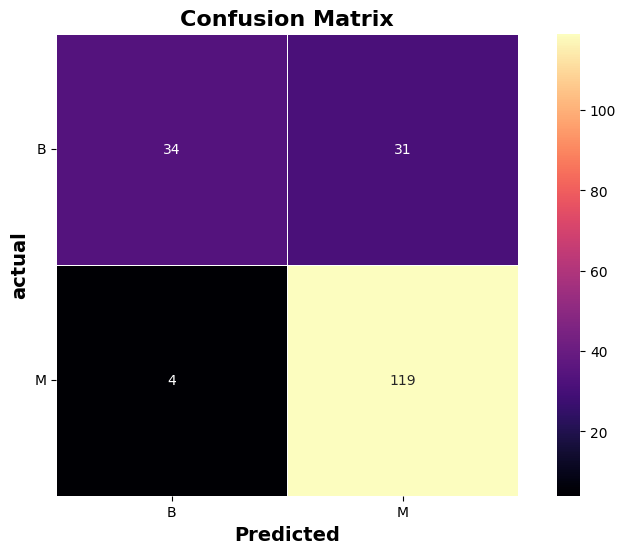

In [ ]:
cm = confusion_matrix(y_test,tahmin)

plt.figure(figsize=(10, 6))

sns.heatmap(
    cm, annot=True, fmt='d', cmap='magma', linewidths=0.4, square=True, cbar=True,
    xticklabels=["B","M"],
    yticklabels=["B","M"]
)

plt.xlabel('Predicted', fontsize=14, fontweight='bold')
plt.ylabel('actual', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.yticks(rotation=360)

plt.show()

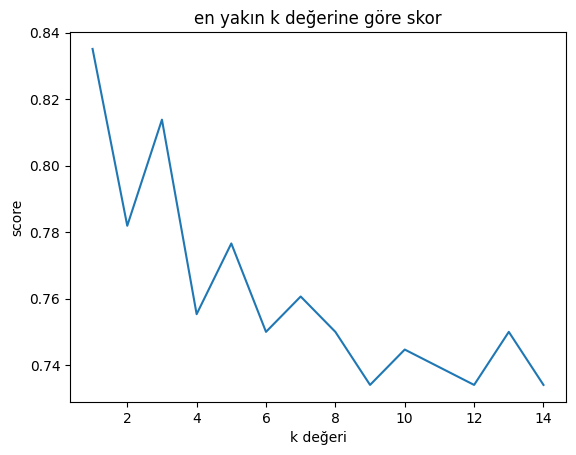

In [ ]:
score_list=[]
for each in range(1,15):
  knn1=KNeighborsClassifier(n_neighbors=each)
  knn1.fit(x_train,y_train)
  score_list.append(knn1.score(x_test,y_test))

plt.title("en yakın k değerine göre skor")
plt.plot(range(1,15),score_list)
plt.xlabel("k değeri")
plt.ylabel("score")
plt.show()